# Data cleaning

Learn how to effectively clean your data by tackling data discrepancies such as noisy data, missing values, outliers and inconsistencies

There are three levels of data cleaning:

*   **First level-General cleaning steps:** By cleaning up the table in order to have a standard data structure and attributes that have intuitive and codable names and rows that have unique identifiers (already done)
*   **Second level-By Unpacking, restructuriing and reformatting the table**(already done)
*   **Third level-**By Dealing with data errors, missing values, detecting and handling outliers, smoothing data (during this serie of programming labs)



---
> Author: Dr. Fadoua Ouamani


---



In [2]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data


In [3]:
tayou_df = pd.read_csv('tayou.csv')
tayou_df

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,NaN,NaN,NaN,NaN,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.0,12.00,Yes,F


In [4]:
tayou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Personality  102 non-null    object 
 1   Collector    102 non-null    object 
 2   Age          102 non-null    int64  
 3   ZodiacSign   102 non-null    object 
 4   FavLg        101 non-null    object 
 5   GStat        93 non-null     float64
 6   GMath        95 non-null     float64
 7   GOOP         94 non-null     float64
 8   GEnglish     96 non-null     float64
 9   LearnNSkill  102 non-null    object 
 10  Gender       102 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 8.9+ KB


**Interpretations:** On peut facilement déterminer les différents champs null (missing value) grace au tableau

### 1. Missing Values

In [5]:
tayou_df.isnull()

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False


**Interpretations:** les != champs Null sont maintenant des True

In [6]:
print('Number of missing values per column')
for colm in tayou_df.columns:
  n_mv=tayou_df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
Personality: 0
Collector: 0
Age: 0
ZodiacSign: 0
FavLg: 1
GStat: 9
GMath: 7
GOOP: 8
GEnglish: 6
LearnNSkill: 0
Gender: 0


**Interpretations:**
les champs manquants par groupe

<Axes: >

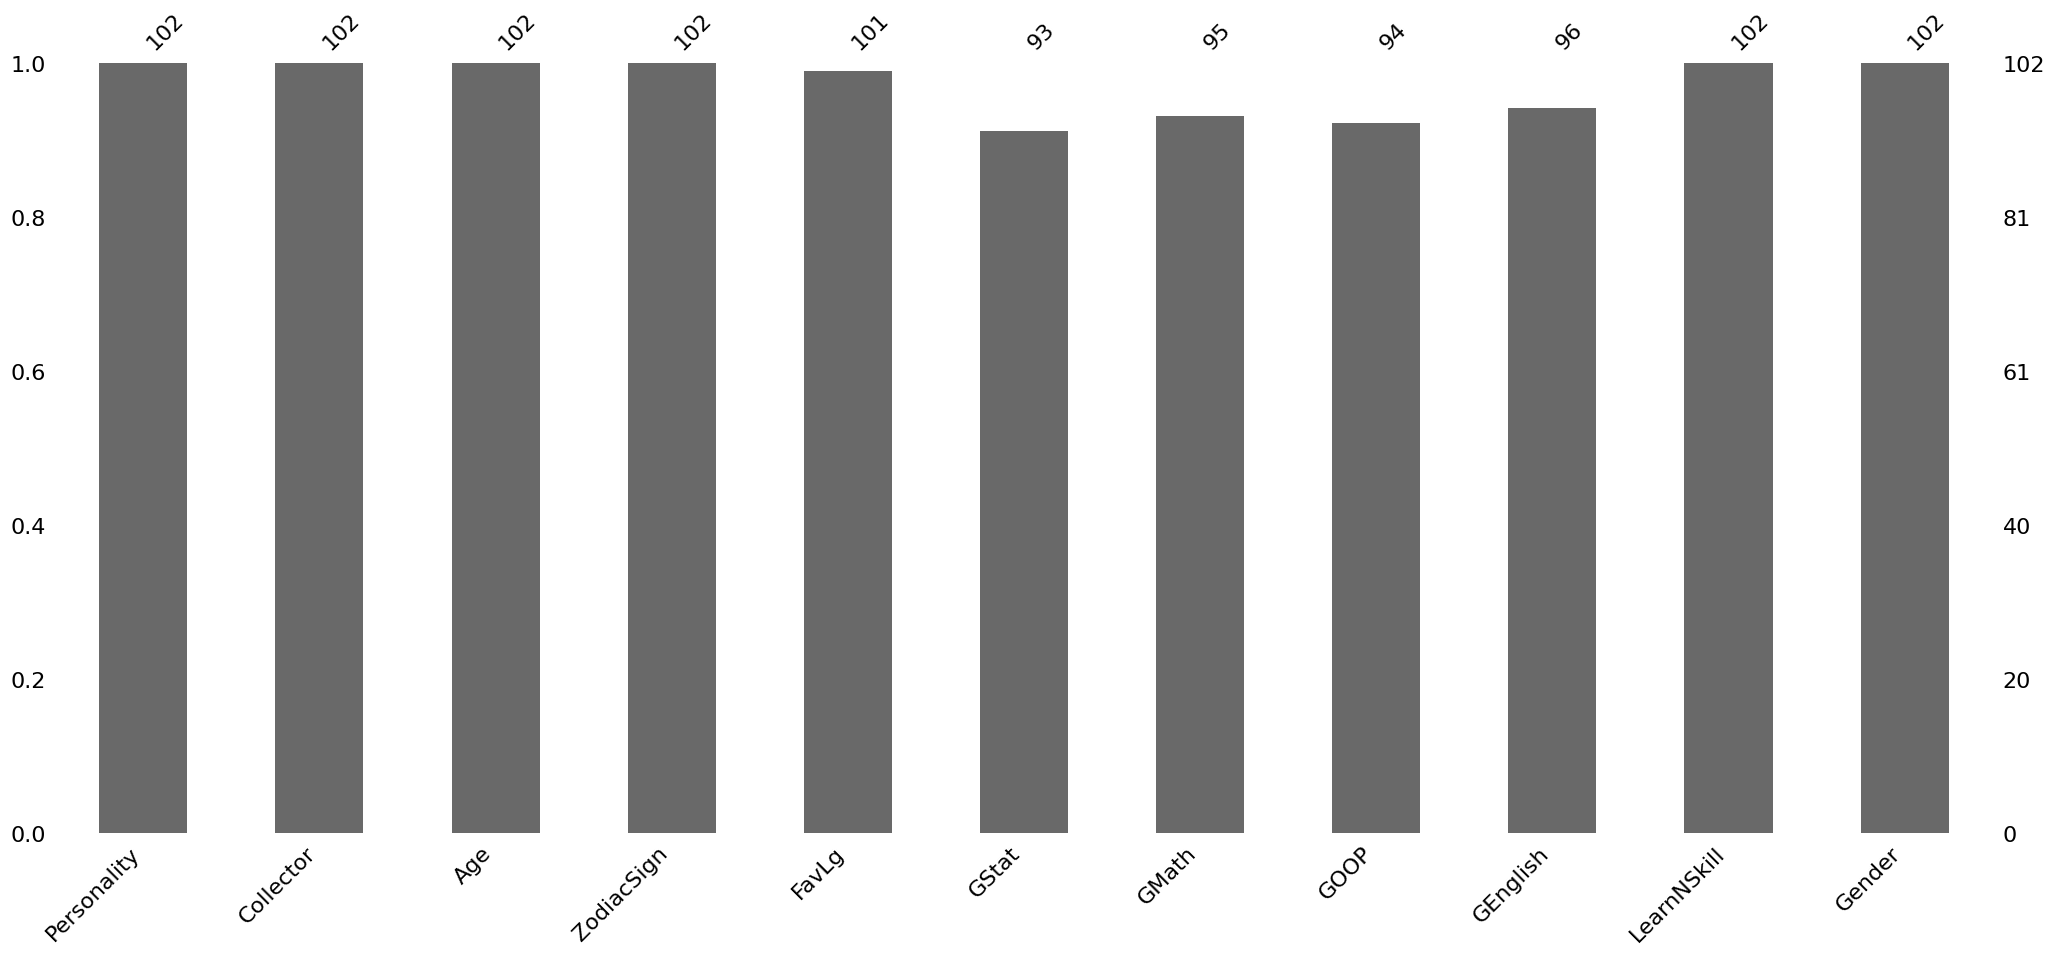

In [7]:
#Visualization of missing value rates using the bar plot
msno.bar(tayou_df)

**Interpretations:**
Visualisation graphique des champs manquants

<Axes: >

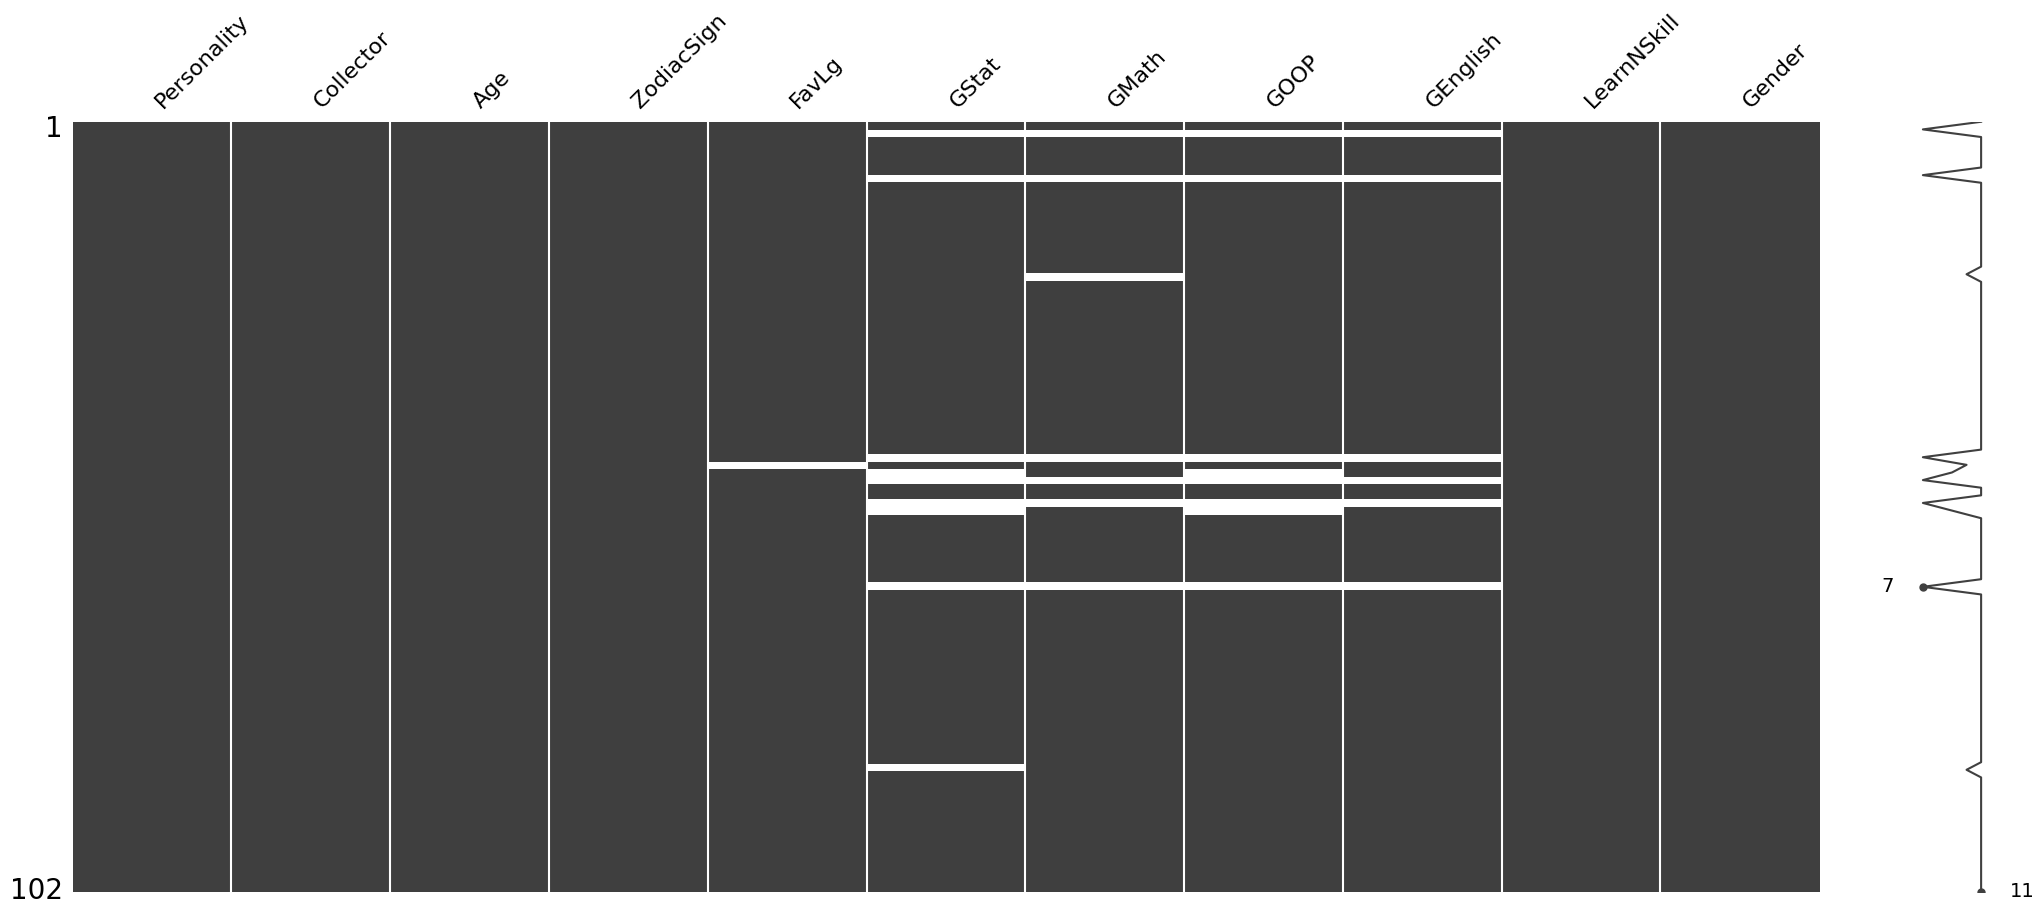

In [8]:
#Finding reasons for missing data using matrix plot
msno.matrix(tayou_df)

**Interpretations:** Les zones blanches ou colorées dans le graphique indiquent les valeurs manquantes, tandis que les zones colorées indiquent les données présentes.Cela permet de facilement repérer où se trouvent les données manquantes dans ton DataFrame et de voir la proportion de valeurs manquantes par colonne.

<Axes: >

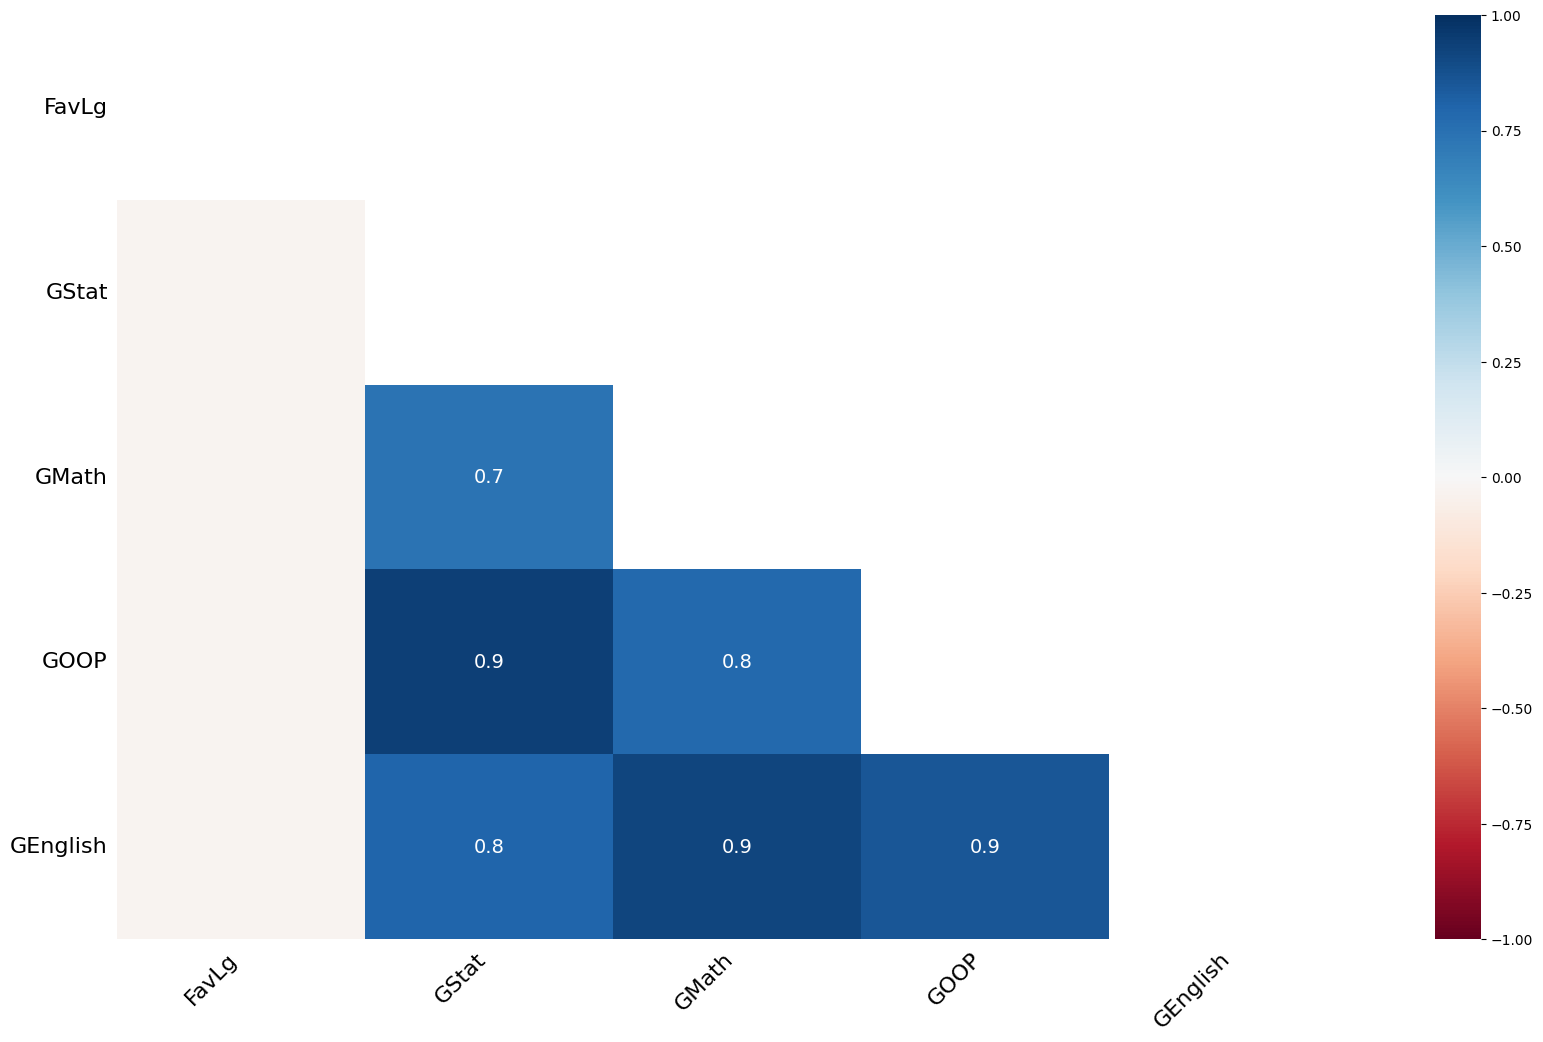

In [9]:
#Finding reasons for missing data using a heatmap
msno.heatmap(tayou_df)

**Interpretations:** Montre la corrélation (dependances) des diff champs on fonction des missing values.
EG: Si la valeur est fortement positive alors l'existance/l'absence d'un attribut invoke propablement (tout depend de la valeur) l'existance/l'absence de l'autre et vise versa

<Axes: >

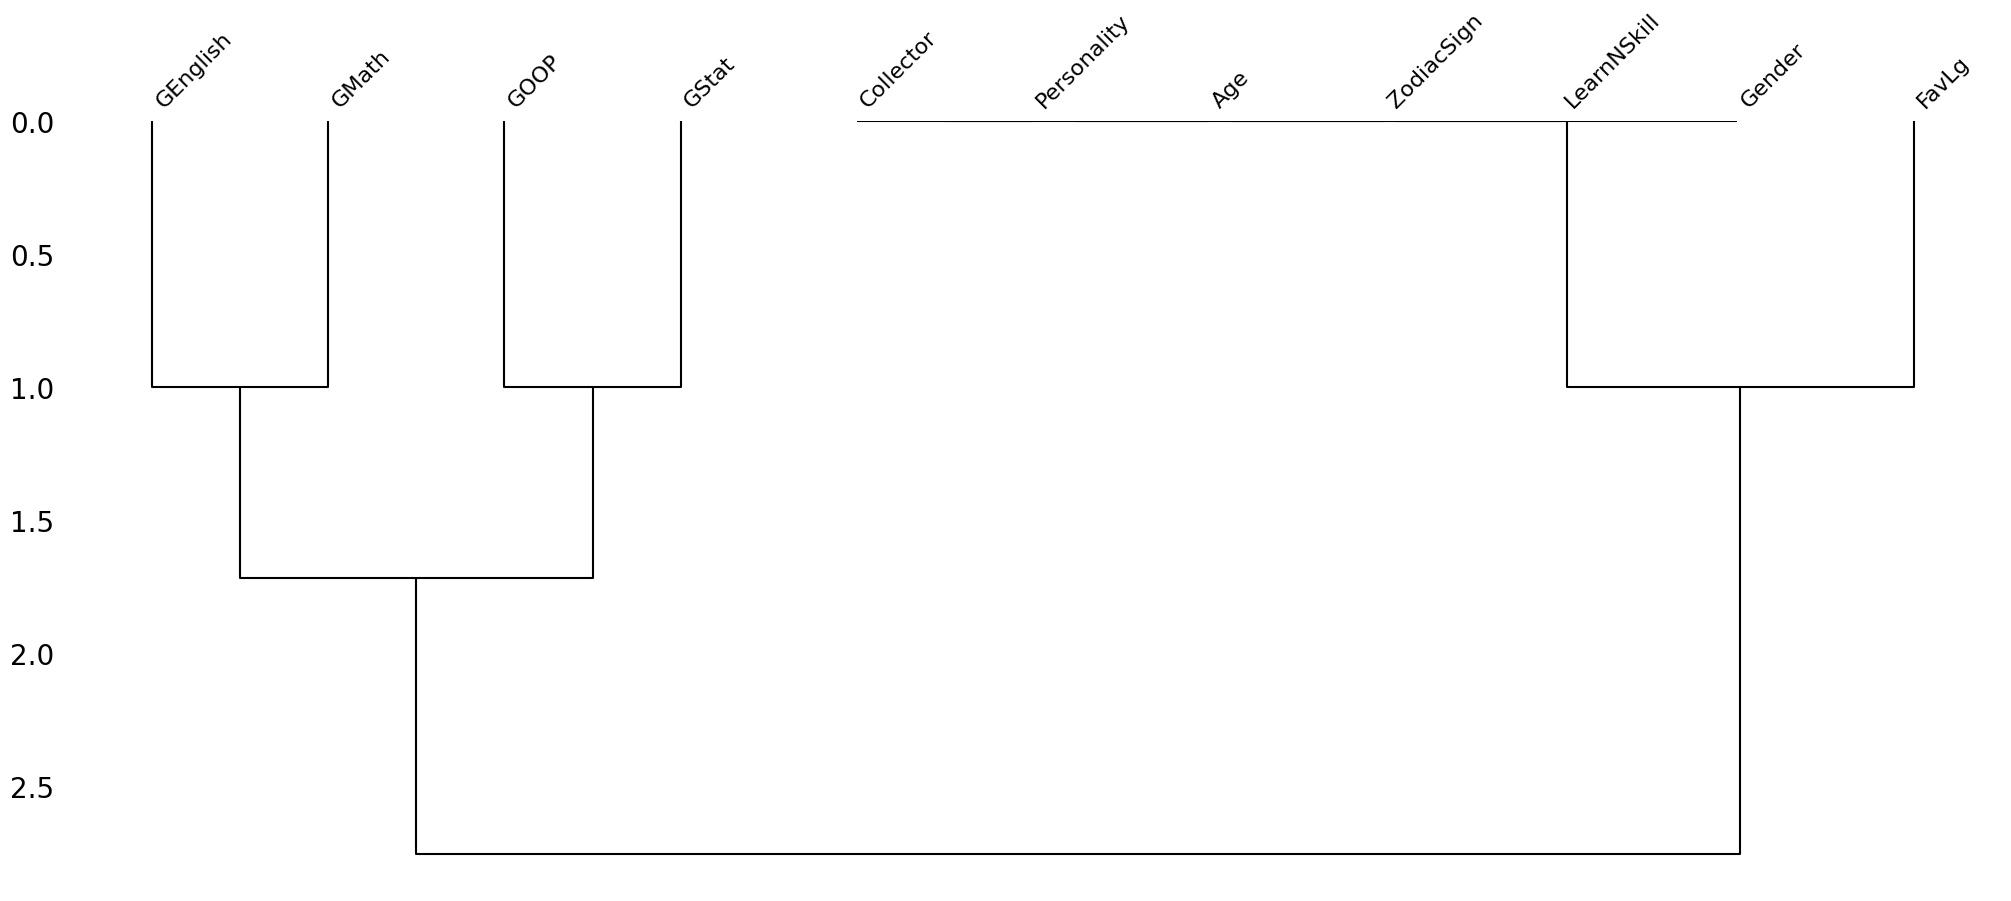

In [10]:
#Finding reasons for missing data using a dendrogram
msno.dendrogram(tayou_df)

**Interpretations:** Regroupe les colonnes selon leur similitude en termes de données manquantes.Plus les colonnes sont similaires dans leurs données manquantes, plus elles sont regroupées étroitement dans le dendrogramme.

In [11]:
#Deletions
#Pairwise deletion
tayou_df_wmv = tayou_df.copy()
tayou_df_wmv['GStat'].mean() #pandas skips the missing values and calculates mean of the remaining values.

13.966451612903226

In [12]:
#Deletions
#Listwise deleltions
tayou_df_wmv.dropna(subset=['GStat'],how='any',inplace=True)
tayou_df_wmv['GStat'].isnull().sum()

0

In [13]:
tayou_df_wmv

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.00,18.00,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.00,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.00,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.00,15.00,Yes,F
5,Lion,Yes,23,Taurus,French,16.5,12.20,13.62,14.50,Yes,M
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.00,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.00,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.00,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.00,12.00,Yes,F


**Interpretations:** All the rows containing a missing value were deleted which is not the optimal solution. ( Already short on instances )

In [14]:
#Deletions
#Dropping the entire columns
tayou_df_wmv.drop('GStat',axis=1,inplace=True)
tayou_df_wmv

,Personality,Collector,Age,ZodiacSign,FavLg,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.00,15.00,18.00,No,M
2,Lion,No,23,Leo,English,10.00,13.00,13.00,Yes,M
3,Lion,No,22,Scorpio,English,12.00,17.00,15.00,Yes,F
4,Lion,No,23,Leo,French,18.15,16.00,15.00,Yes,F
5,Lion,Yes,23,Taurus,French,12.20,13.62,14.50,Yes,M
...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,15.00,16.00,14.00,Yes,M
98,Lion,No,22,Scorpio,French,15.00,14.00,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,17.00,12.00,13.00,No,M
100,Beaver,No,23,Pisces,French,15.00,13.00,12.00,Yes,F


In [15]:
#Imputations for non time series data
# imputing with a constant
from sklearn.impute import SimpleImputer
tayou_df_const = tayou_df.copy()
#setting strategy to 'constant'
const_imputer = SimpleImputer(strategy='constant') # imputing using constant value
tayou_df_const.iloc[:,:] = const_imputer.fit_transform(tayou_df_const)
tayou_df_const.isnull().sum()

C:\Users\pc\AppData\Local\Temp\ipykernel_11284\67052652.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[15.0, 'missing_value', 10.0, 14.0, 18.0, 16.5, 15.0, 'missing_value', 16.0, 15.98, 13.0, 12.0, 15.0, 15.0, 14.3, 10.0, 18.08, 11.0, 16.0, 12.0, 16.7, 10.0, 12.0, 8.4, 12.35, 10.0, 18.0, 13.0, 19.0, 15.38, 15.9, 15.0, 10.53, 17.98, 15.0, 9.0, 16.65, 13.0, 14.0, 16.84, 18.0, 9.8, 10.0, 11.74, 'missing_value', 15.49, 'missing_value', 'missing_value', 16.4, 11.4, 'missing_value', 'missing_value', 12.0, 11.0, 17.0, 15.0, 11.09, 15.0, 15.0, 15.0, 10.0, 'missing_value', 15.0, 15.0, 18.0, 10.0, 14.0, 10.5, 12.0, 15.0, 17.0, 14.0, 15.0, 10.25, 15.5, 17.5, 18.5, 16.79, 15.0, 14.0, 13.0, 14.0, 12.0, 13.0, 16.0, 'missing_value', 13.33, 16.0, 13.0, 10.0, 13.0, 15.0, 17.0, 16.0, 12.0, 12.0, 12.0, 13.0, 14.0, 16.0, 14.0, 12.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tayou

Personality    0
Collector      0
Age            0
ZodiacSign     0
FavLg          0
GStat          0
GMath          0
GOOP           0
GEnglish       0
LearnNSkill    0
Gender         0
dtype: int64

In [16]:
tayou_df_const

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.0,15.0,18.0,No,M
1,Otter,No,23,Pisces,French,missing_value,missing_value,missing_value,missing_value,No,M
2,Lion,No,23,Leo,English,10.0,10.0,13.0,13.0,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.0,17.0,15.0,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.0,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.0,16.0,14.0,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.0,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.0,12.0,13.0,No,M
100,Beaver,No,23,Pisces,French,14.0,15.0,13.0,12.0,Yes,F


**Interpretations:** All the Nulls were changed to a constante named missing_value without dropping any row or column which only helps in noticing the null fields ( the algorithms will still skip these values ).

In [43]:
#Imputations for non time series data
# imputing with general central tendency
tayou_df_centTend = tayou_df.copy()
#setting strategy to 'most_frequent' to impute by the mode
md_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median, by default mean
tayou_df_centTend.iloc[:,:] = md_imputer.fit_transform(tayou_df_centTend)
tayou_df_centTend.isnull().sum()

Personality    0
Collector      0
Age            0
ZodiacSign     0
FavLg          0
GStat          0
GMath          0
GOOP           0
GEnglish       0
LearnNSkill    0
Gender         0
dtype: int64

In [18]:
tayou_df_centTend

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,15.0,15.00,15.0,15.00,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.0,12.00,Yes,F


In [19]:
num_split=tayou_df.loc[:,tayou_df.dtypes!=object]


In [37]:
#Advanced imputation techniques
#Using KNN
num_split_knn= num_split.copy()
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, metric='nan_euclidean', weights='uniform') #By default parameters except the n_neighbors changed to 3 as it was 5
num_split_knn.iloc[:,:] = imputer.fit_transform(num_split_knn)
num_split_knn.isnull().sum()

Age         0
GStat       0
GMath       0
GOOP        0
GEnglish    0
dtype: int64

In [38]:
num_split_knn

,Age,GStat,GMath,GOOP,GEnglish
0,24,15.0,15.000,15.0,18.00
1,23,14.0,14.075,14.5,14.00
2,23,10.0,10.000,13.0,13.00
3,22,14.0,12.000,17.0,15.00
4,23,18.0,18.150,16.0,15.00
...,...,...,...,...,...
97,23,13.0,15.000,16.0,14.00
98,22,14.0,15.000,14.0,14.33
99,24,16.0,17.000,12.0,13.00
100,23,14.0,15.000,13.0,12.00


In [22]:
#Advanced imputation techniques
#Using MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #Multivariate imputer that estimates each feature from all the others, as a function of other features in a round-robin fashion
tayou_df_mice = tayou_df.copy()

mice_imputer = IterativeImputer()
tayou_df_mice['GStat'] = mice_imputer.fit_transform(tayou_df_mice[['GStat']])
tayou_df_mice.isnull().sum()

Personality    0
Collector      0
Age            0
ZodiacSign     0
FavLg          1
GStat          0
GMath          7
GOOP           8
GEnglish       6
LearnNSkill    0
Gender         0
dtype: int64

In [23]:
tayou_df_mice

,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.000000,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,13.966452,NaN,NaN,NaN,No,M
2,Lion,No,23,Leo,English,10.000000,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.000000,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.000000,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.000000,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.000000,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.000000,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.000000,15.00,13.0,12.00,Yes,F


**Exercice:**

Study the central tendency, dispersion, symmetry of your data after getting rid of missing values and outliers using these techniques
Indication: You will need to do the same tasks as Progromming lab 1 on your cleaned data

In [4]:
# 1. Remove missing values
cleaned_tayou_df = tayou_df.dropna()

# Central Tendency
mean_values = cleaned_tayou_df.mean(numeric_only=True)
median_values = cleaned_tayou_df.median(numeric_only=True)
mode_values = cleaned_tayou_df.mode(numeric_only=True).iloc[0]  # mode might have multiple rows, take the first

# Dispersion
variance_values = cleaned_tayou_df.var(numeric_only=True)
std_dev_values = cleaned_tayou_df.std(numeric_only=True)

# Symmetry
skewness_values = cleaned_tayou_df.skew(numeric_only=True)
kurtosis_values = cleaned_tayou_df.kurt(numeric_only=True)

# Results
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)
print("\nVariance:\n", variance_values)
print("\nStandard Deviation:\n", std_dev_values)
print("\nSkewness:\n", skewness_values)
print("\nKurtosis:\n", kurtosis_values)


Mean:
 Age         23.021978
GStat       13.919670
GMath       13.893077
GOOP        14.693846
GEnglish    14.102198
dtype: float64

Median:
 Age         23.00
GStat       14.00
GMath       14.00
GOOP        15.00
GEnglish    14.18
dtype: float64

Mode:
 Age         23.0
GStat       15.0
GMath       15.0
GOOP        15.0
GEnglish    15.0
Name: 0, dtype: float64

Variance:
 Age         0.488400
GStat       6.632412
GMath       4.738539
GOOP        3.485522
GEnglish    4.867335
dtype: float64

Standard Deviation:
 Age         0.698857
GStat       2.575347
GMath       2.176819
GOOP        1.866955
GEnglish    2.206204
dtype: float64

Skewness:
 Age         1.168321
GStat      -0.117365
GMath      -0.044718
GOOP       -0.333159
GEnglish   -0.123112
dtype: float64

Kurtosis:
 Age         3.708268
GStat      -0.878315
GMath       0.546706
GOOP       -0.328617
GEnglish    0.572577
dtype: float64
